# Momento de Retroalimentación: 
## Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework.
## (Portafolio Implementación)
### Alan Contreras Prieto - A01749667

In [14]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Etapa anterior

In [15]:
data = sklearn.datasets.make_classification(
    n_samples=10000, 
    n_features=5,  
    n_classes=2
)

X = data[0]
y = data[1]
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
df['y'] = y
df["y"].value_counts()

y
1    5007
0    4993
Name: count, dtype: int64

In [16]:
# Dividir datos en entrenamiento y  prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
tree_clf = tree.DecisionTreeClassifier()

folds = KFold(n_splits=5) #creación de los folds 

dicHiper = {} 
dicHiper["criterion"] = ['gini', 'entropy',"log_loss"] 
dicHiper["splitter"] = ['best', 'random'] 
dicHiper["max_depth"] = [5,10,15,20,25,30] 
dicHiper["min_samples_split"] = [50,100,250,500]

hpSearch = GridSearchCV(tree_clf,dicHiper,n_jobs=-1,scoring="accuracy",cv=folds,verbose=3) 

result = hpSearch.fit(X,y) 
print(f"Mejor score {result.best_score_}") 
print(f"Mejores hiperparámetros: {result.best_params_}\n\n\n") 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejor score 0.9452
Mejores hiperparámetros: {'criterion': 'log_loss', 'max_depth': 20, 'min_samples_split': 100, 'splitter': 'random'}





In [18]:
tree_clf = result.best_estimator_
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)


Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1014
           1       0.96      0.94      0.95       986

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



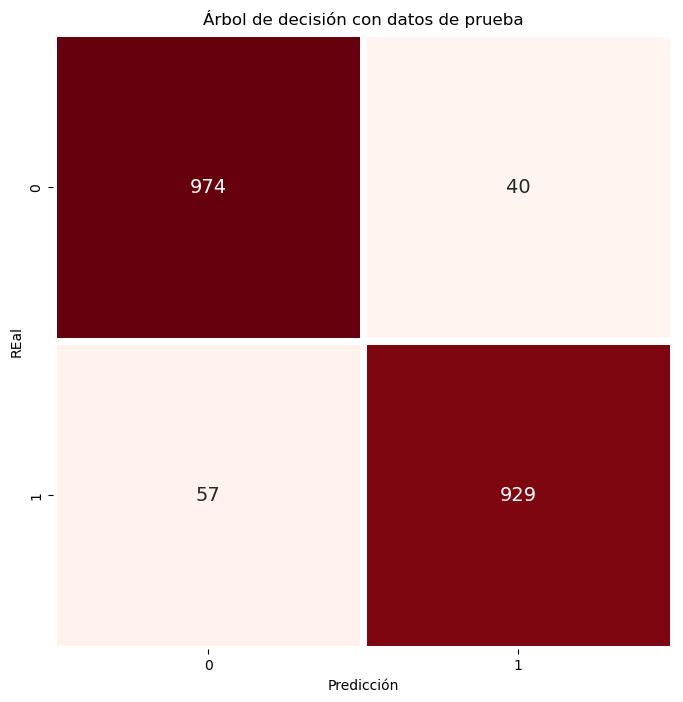

In [19]:
# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(8,8))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicción")
plt.ylabel("REal")
plt.title("Árbol de decisión con datos de prueba")
plt.show()

# Dataset

In [20]:
data = sklearn.datasets.make_classification(
    n_samples=50000, 
    n_features=10,
    n_classes=5,
    
    n_informative=5
)

X = data[0]
y = data[1]
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df['y'] = y
df["y"].value_counts()

y
0    10033
4    10015
2     9987
3     9983
1     9982
Name: count, dtype: int64

In [21]:
# Dividir datos en entrenamiento y  prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelos

## Arboles de decisión

In [22]:
tree_clf = RandomForestClassifier()

folds = KFold(n_splits=5) #creación de los folds

dicHiper = {} 
dicHiper["n_estimators"] = [10, 50, 100]
dicHiper["criterion"] = ['gini', 'entropy',"log_loss"] 
dicHiper["max_depth"] = [10,20,30, None] 
dicHiper["min_samples_split"] = [50,100,250,500]

hpSearch = GridSearchCV(tree_clf,dicHiper,n_jobs=-1,scoring="accuracy",cv=folds,verbose=3)

result = hpSearch.fit(X_train,y_train)
print(f"Mejor score {result.best_score_}") 
print(f"Mejores hiperparámetros: {result.best_params_}\n\n\n")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejor score 0.8189249999999999
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 50, 'n_estimators': 100}





### Entrenamiento

In [23]:
tree_clf = result.best_estimator_
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)


Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.84      0.82      0.83      2005
     Clase 1       0.82      0.80      0.81      1999
     Clase 2       0.86      0.90      0.88      2044
     Clase 3       0.84      0.83      0.83      1958
     Clase 4       0.82      0.82      0.82      1994

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



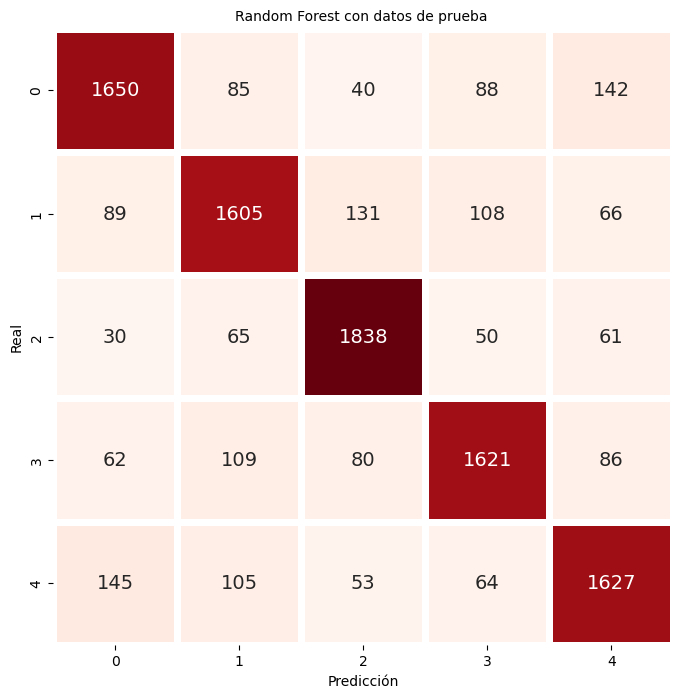

In [24]:
# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4"]))



cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1","2","3","4"], index= ["0","1","2","3","4"], data= cm )

f,ax = plt.subplots(figsize=(8,8))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Random Forest con datos de prueba ", size = 10)
plt.show()

# Importar a .py

In [26]:
!jupyter nbconvert --to script Practica2.ipynb

[NbConvertApp] Converting notebook Practica2.ipynb to script
[NbConvertApp] Writing 4286 bytes to Practica2.py
